<a href="https://colab.research.google.com/github/AlexanderDev2004/MachineLearning_Smst5_2025/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Alexander Agung Raya </br>
Kelas/Absen : TI-3H/01 </br>
Nim : 2341720040 </br>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [47]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. Lakukan inspeksi profile data
print('-----------------soal 1-----------------')
df.info()
df.describe()
print('------------------------------------')
# 2. Variabel apa yang memiliki nilai yang hilang (missing value) dan berapa jumlahnya?
print('------------------soal 2----------------')
print("Kolom nilai yang hilang (missing value) Adalah :")
df.isnull().sum()



-----------------soal 1-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
------------------------------------
---------------

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Kesimpulannya adalah : </br>
Kolom Yang Hilang adalah
- occupation        966
- workclass         963
- native-country    274

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [51]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. melakukan proses data imputation pada fitur yang memiliki data yang hilang
df['occupation'].fillna(value=df['occupation'].mode()[0], inplace=True)
df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)
df['native-country'].fillna(value=df['native-country'].mode()[0], inplace=True)


# Cek kembali apakah masih terdapat data yang hilang
print('------------------2.Cek kembali apakah masih terdapat data yang hilang----------------')
print("Kolom nilai yang hilang (missing value) Adalah :")
print(df.isnull().sum())
print('------------------------------------')

------------------2.Cek kembali apakah masih terdapat data yang hilang----------------
Kolom nilai yang hilang (missing value) Adalah :
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
------------------------------------


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [60]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Ambil Data
cat_cols = df.select_dtypes(include=["object"]).columns

# Tampilkan nilai unik dari tiap fitur kategorikal
for col in cat_cols:
    print(f"\nFitur: {col}")
    print(df[col].unique()[:20])
    print(f"Total kategori unik: {df[col].nunique()}")


# 1. Bersihkan spasi
for col in cat_cols:
    df[col] = df[col].str.strip()

# 2. Normalisasi case ke huruf kecil agar semua biar konsisten
for col in cat_cols:
    df[col] = df[col].str.lower()

# 3. Ganti value aneh (misalnya '?') dengan 'others'
for col in cat_cols:
    df[col] = df[col].replace("?", "others")

# 4. Gabungkan kategori langka (<1% data) jadi 'others'
threshold = 0.01
for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare_values = freq[freq < threshold].index
    df[col] = df[col].replace(rare_values, "others")
for col in cat_cols:
    print(f"\nFitur: {col}")
    print(df[col].unique()[:20])
    print(f"Total kategori unik setelah cleaning Adalah : {df[col].nunique()}")
    print('---------------------------------------------------------------------')



Fitur: workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'others' 'self-emp-inc']
Total kategori unik: 7

Fitur: education
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th' 'others'
 '12th']
Total kategori unik: 15

Fitur: marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'others' 'widowed']
Total kategori unik: 7

Fitur: occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' 'others'
 'protective-serv']
Total kategori unik: 13

Fitur: relationship
['not-in-family' 'husband' 'wife' 'own-child' 'unmarried' 'other-relative']
Total kategori unik: 6

Fitur: race
['white' 'black' 'asian-pac-islander' 'others']
Total kategori unik: 4

Fitur: sex
['male' 'female']
Total kategori unik: 2


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

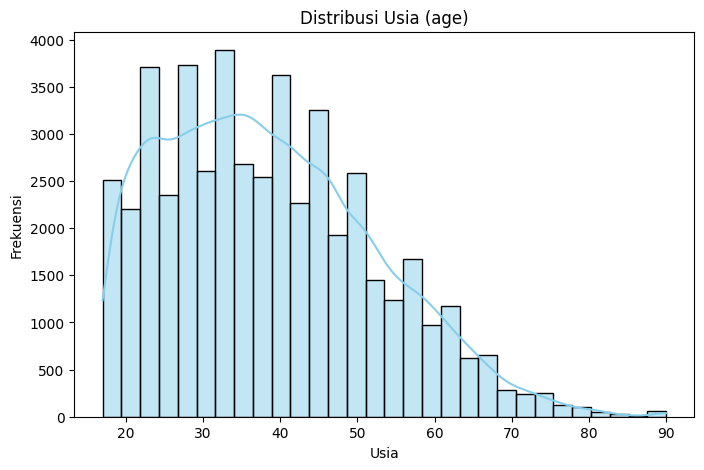

In [65]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Usia (age)")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

/tmp/ipython-input-1616629074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data=df, order=df['education'].value_counts().index, palette="viridis")


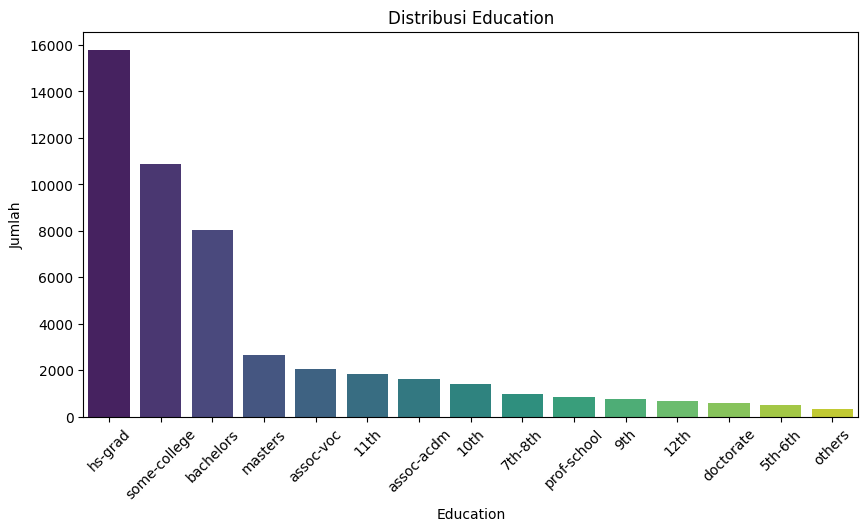

In [66]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10,5))
sns.countplot(x="education", data=df, order=df['education'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribusi Education")
plt.xlabel("Education")
plt.ylabel("Jumlah")
plt.show()

/tmp/ipython-input-1281630705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y="hours-per-week", data=df, palette="Set2")


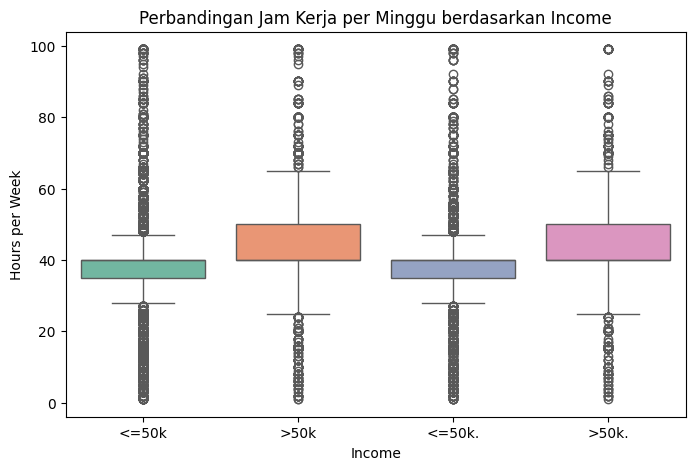

In [67]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="income", y="hours-per-week", data=df, palette="Set2")
plt.title("Perbandingan Jam Kerja per Minggu berdasarkan Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()


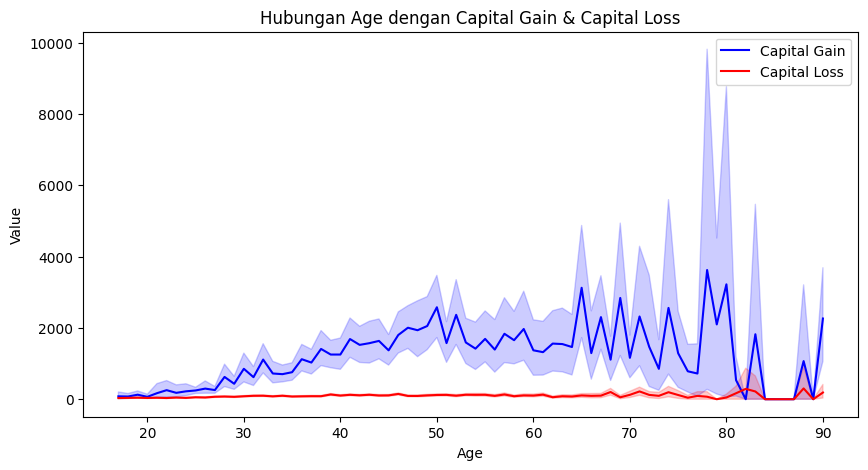

In [68]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(10,5))

# Kapital gain
sns.lineplot(x="age", y="capital-gain", data=df, label="Capital Gain", color="blue")

# Kapital loss
sns.lineplot(x="age", y="capital-loss", data=df, label="Capital Loss", color="red")

plt.title("Hubungan Age dengan Capital Gain & Capital Loss")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [14]:
# Jawab dengan komentar python

'''
1. Distribusi 'age':
   - Mayoritas usia 20–50 tahun.
   - Menurun drastis >60 tahun.
   - Right-skewed, sedikit data usia tua.

2. Strategi imputasi 'age':
   - Gunakan median → lebih stabil & tahan outlier.

3. Outlier 'hours-per-week' per 'income':
   - Deteksi dengan IQR.
   - Income <=50K punya outlier terbanyak.
   - Income >50K lebih sedikit.
'''


'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [70]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

# melakukan Encoder
le = LabelEncoder()

# Encoding kolom 'sex'
df['sex'] = le.fit_transform(df['sex'])
# male → 1, female → 0 (urutan bisa berbeda tergantung dataset)

# Encoding kolom 'income' sebagai target
df['income'] = le.fit_transform(df['income'])
# <=50K → 0, >50K → 1

# Cek hasil
print(df[['sex','income']].head())

   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

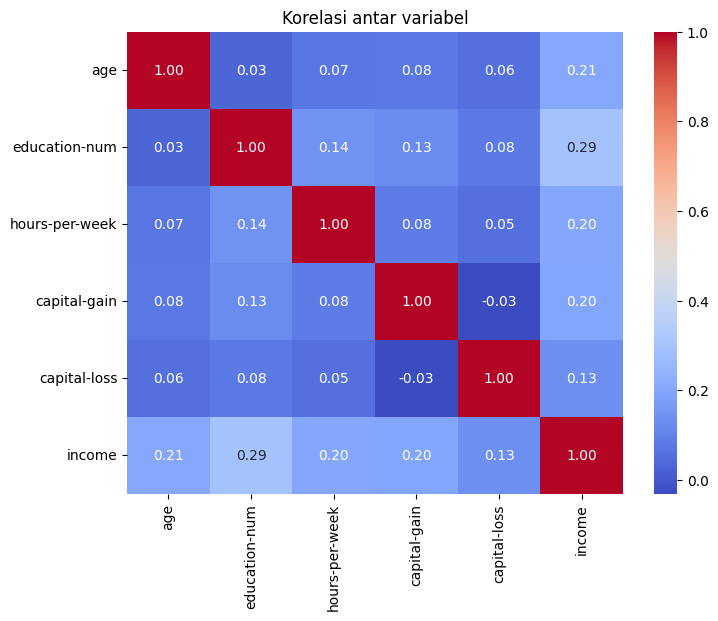

In [71]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cols = ['age','education-num','hours-per-week','capital-gain','capital-loss','income']
corr = df[cols].corr()

# Tampilkan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()

In [17]:
# Hasil analisis jelaskan pada cell ini
'''
- 'education-num' berkorelasi positif dengan 'income':
  semakin tinggi pendidikan, semakin besar peluang berpenghasilan >50K.

- 'capital-gain' punya korelasi paling kuat dengan 'income':
  individu dengan capital-gain tinggi cenderung berpenghasilan >50K.

- 'capital-loss' juga ada korelasi positif, tapi lebih lemah dibanding capital-gain.

- 'hours-per-week' berkorelasi positif lemah dengan 'income':
  kerja lebih lama sedikit berhubungan dengan penghasilan lebih tinggi.

- 'age' punya korelasi sedang dengan 'income':
  usia lebih tua (usia produktif menengah ke atas) cenderung berpenghasilan lebih tinggi.
'''


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [18]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


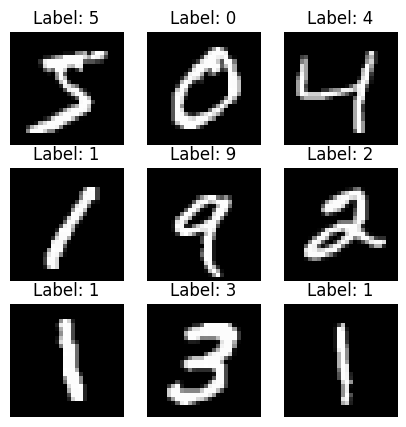

In [19]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [72]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

# Buat array kosong untuk menampung hasil dari upsampling
X_train_up = np.zeros((X_train.shape[0], 32, 32), dtype=np.uint8)
X_test_up  = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# Resize setiap citra ukuran ke 32x32
for i in range(X_train.shape[0]):
    X_train_up[i] = cv2.resize(X_train[i], (32, 32), interpolation=cv2.INTER_CUBIC)

for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Train upsampled shape:", X_train_up.shape)
print("Test upsampled shape :", X_test_up.shape)

Train upsampled shape: (60000, 32, 32)
Test upsampled shape : (10000, 32, 32)


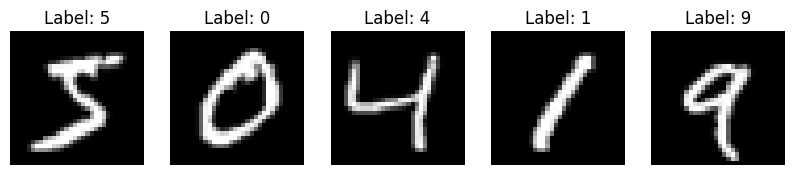

In [73]:
# Soal 2 - Tampilkan hasil dari Soal 1
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Train shape: (60000, 32, 32)
Test shape : (10000, 32, 32)
Rentang nilai: 0.0 -> 1.0


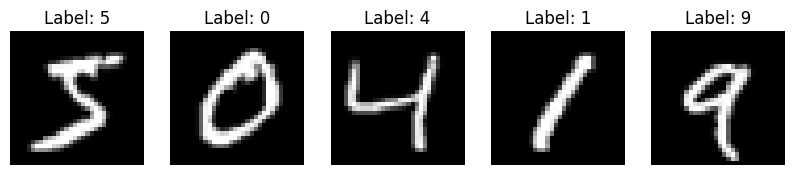

In [74]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# melakukan Normalisasi ke rentang 0-1
X_train_norm = X_train_up.astype("float32") / 255.0
X_test_norm  = X_test_up.astype("float32") / 255.0

print("Train shape:", X_train_norm.shape)
print("Test shape :", X_test_norm.shape)
print("Rentang nilai:", X_train_norm.min(), "->", X_train_norm.max())


plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_norm[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [75]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


X_test_flat = np.zeros((X_test_norm.shape[0], X_test_norm.shape[1] * X_test_norm.shape[2]))


for i in range(X_test_norm.shape[0]):
    X_test_flat[i, :] = X_test_norm[i].flatten()

print("Shape sebelum flatten :", X_test_norm.shape)
print("Shape sesudah flatten:", X_test_flat.shape)


Shape sebelum flatten : (10000, 32, 32)
Shape sesudah flatten: (10000, 1024)
